<a href="https://colab.research.google.com/github/luishpinto/scania-heavy-duty-trucks/blob/master/scania_aps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.size'] = 12

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Data-reading & Missing-Values Correction ..

In [0]:
dftr = pd.read_csv('aps_failure_training_set.csv',sep = ',',skiprows = 20,na_values = 'na')
dftr['class'] = pd.factorize(dftr['class'])[0]
dftr = pd.DataFrame(SimpleImputer(missing_values = np.nan,strategy = 'mean').fit_transform(dftr),
                    columns = dftr.columns)

dfte = pd.read_csv('aps_failure_test_set.csv',sep = ',',skiprows = 20,na_values = 'na')
dfte['class'] = pd.factorize(dfte['class'])[0]
dfte = pd.DataFrame(SimpleImputer(missing_values = np.nan,strategy = 'mean').fit_transform(dfte),
                    columns = dfte.columns)

In [0]:
df = pd.concat([dftr,dfte],ignore_index = True)

In [0]:
dftr.iloc[:,1:-1] = (dftr.iloc[:,1:-1] - df.iloc[:,1:-1].min()) / (df.iloc[:,1:-1].max() - df.iloc[:,1:-1].min())
dfte.iloc[:,1:-1] = (dfte.iloc[:,1:-1] - df.iloc[:,1:-1].min()) / (df.iloc[:,1:-1].max() - df.iloc[:,1:-1].min())
df.iloc[:,1:-1] = (df.iloc[:,1:-1] - df.iloc[:,1:-1].min()) / (df.iloc[:,1:-1].max() - df.iloc[:,1:-1].min())

In [0]:
print(dftr)

       class        aa_000    ab_000  ...    ee_009    ef_000  eg_000
0        0.0  1.785765e-03  0.003496  ...  0.000000  0.000000     0.0
1        0.0  7.696916e-04  0.003496  ...  0.000328  0.000000     0.0
2        0.0  9.555370e-04  0.003496  ...  0.000112  0.000000     0.0
3        0.0  2.793968e-07  0.000000  ...  0.000000  0.008299    32.0
4        0.0  1.417333e-03  0.003496  ...  0.000266  0.000000     0.0
...      ...           ...       ...  ...       ...       ...     ...
59995    0.0  3.562355e-03  0.003496  ...  0.006255  0.000000     0.0
59996    0.0  5.322509e-05  0.003496  ...  0.000000  0.000000     0.0
59997    0.0  2.607703e-06  0.000000  ...  0.000000  0.000000     0.0
59998    0.0  1.869444e-03  0.003496  ...  0.084986  0.000000     0.0
59999    0.0  9.364914e-04  0.003496  ...  0.000035  0.000000     0.0

[60000 rows x 171 columns]


## Plotting Data ..

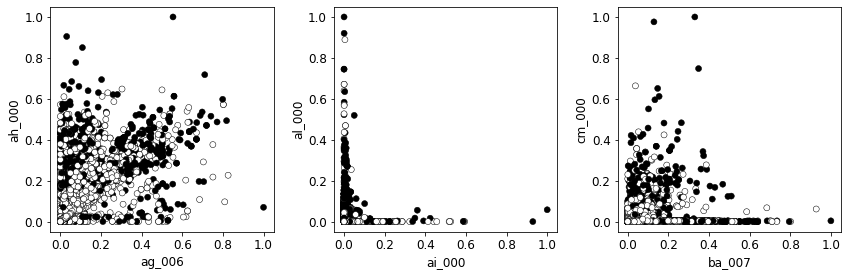

In [0]:
fig,ax = plt.subplots(1,3,figsize = (12.0,4.0))
plt.subplot(1,3,1)
plt.scatter(df.iloc[:,13].values,df.iloc[:,17].values,c = df['class'],cmap = plt.cm.binary,
            edgecolors = 'black',linewidths = 0.50)
plt.xlabel(df.keys()[13])
plt.ylabel(df.keys()[17])

plt.subplot(1,3,2)
plt.scatter(df.iloc[:,18].values,df.iloc[:,21].values,c = df['class'],cmap = plt.cm.binary,
            edgecolors = 'black',linewidths = 0.50)
plt.xlabel(df.keys()[18])
plt.ylabel(df.keys()[21])

plt.subplot(1,3,3)
plt.scatter(df.iloc[:,60].values,df.iloc[:,99].values,c = df['class'],cmap = plt.cm.binary,
            edgecolors = 'black',linewidths = 0.50)
plt.xlabel(df.keys()[60])
plt.ylabel(df.keys()[99])

plt.tight_layout()
# plt.savefig('fig-2.ps',dip = 300,format = 'ps')
plt.show()

## Resampling Data-Set ( imbalance correction ) ..

In [0]:
X = dftr.iloc[:,1:].values
X = SimpleImputer(missing_values = np.nan,strategy = 'mean').fit_transform(X)
y = dftr['class'].values

W = dfte.iloc[:,1:].values
W = SimpleImputer(missing_values = np.nan,strategy = 'mean').fit_transform(W)
z = dfte['class'].values

In [0]:
ros = RandomOverSampler(random_state = 21)
X,y = ros.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Selecting Train & Test Data-Sets ..

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 21,stratify = y)

## Random Forest Classifier ..

In [0]:
rfc = RandomForestClassifier(random_state = 21,class_weight = {0.0:10.0,1.0:0.1})
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0.0: 10.0, 1.0: 0.1}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=21, verbose=0, warm_start=False)

In [0]:
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred,normalize = 'true').round(4) * 100.0)

[[ 99.59   0.41]
 [  0.   100.  ]]


In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17700
         1.0       1.00      1.00      1.00     17700

    accuracy                           1.00     35400
   macro avg       1.00      1.00      1.00     35400
weighted avg       1.00      1.00      1.00     35400



In [0]:
y_pred = rfc.predict(W)
print(confusion_matrix(z,y_pred,normalize = 'true').round(4) * 100.0)

[[99.68  0.32]
 [15.2  84.8 ]]


In [0]:
print(classification_report(z,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15625
         1.0       0.86      0.85      0.86       375

    accuracy                           0.99     16000
   macro avg       0.93      0.92      0.93     16000
weighted avg       0.99      0.99      0.99     16000

